In [1]:

!pip install -q wordcloud
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


<ipython-input-3-fed4fe6571ac>:53: UserWarning: Glyph 127781 (\N{WHITE SUN BEHIND CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-fed4fe6571ac>:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127781 (\N{WHITE SUN BEHIND CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


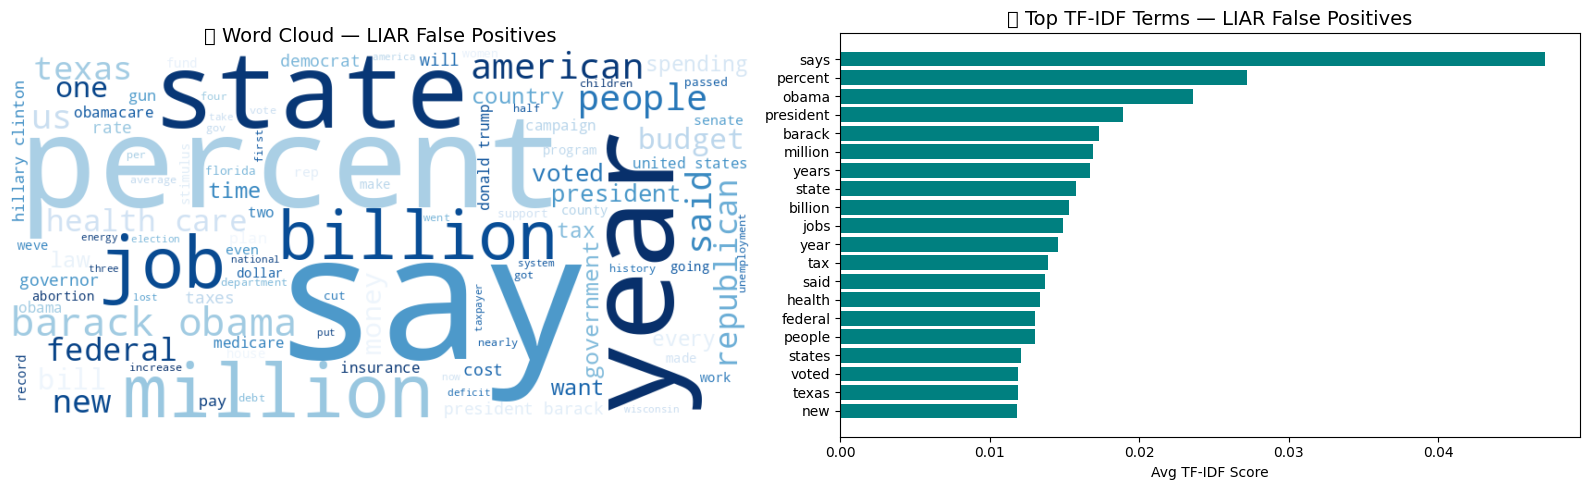

<ipython-input-3-fed4fe6571ac>:53: UserWarning: Glyph 127781 (\N{WHITE SUN BEHIND CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-fed4fe6571ac>:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127781 (\N{WHITE SUN BEHIND CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


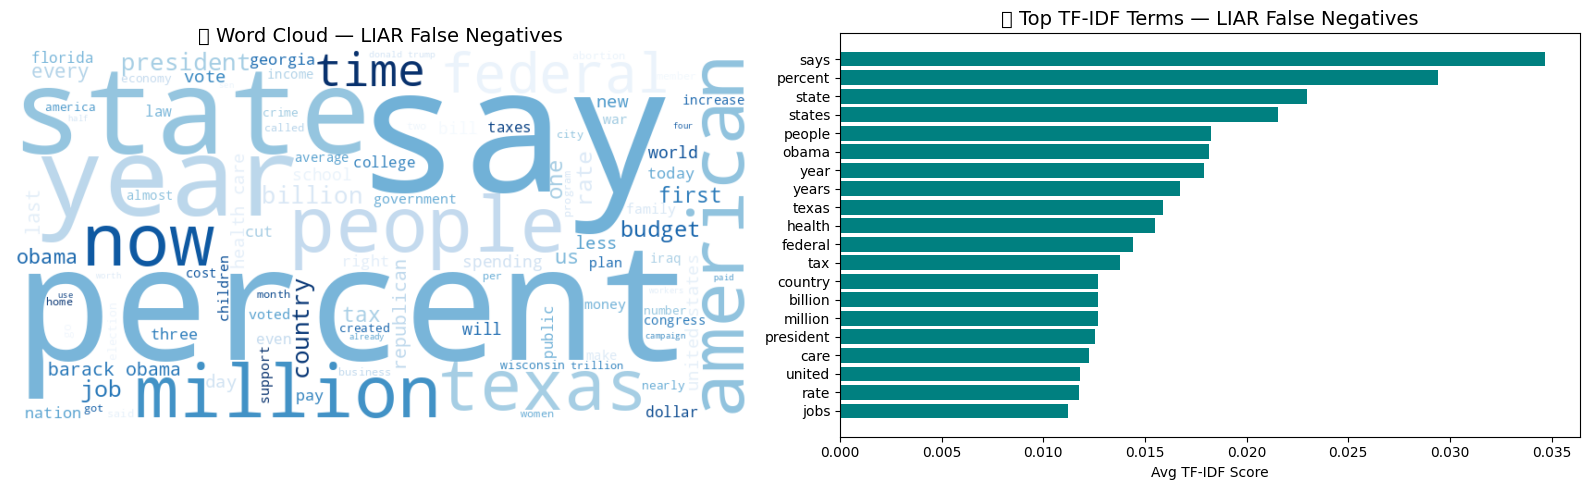

<ipython-input-3-fed4fe6571ac>:53: UserWarning: Glyph 127781 (\N{WHITE SUN BEHIND CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-fed4fe6571ac>:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127781 (\N{WHITE SUN BEHIND CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


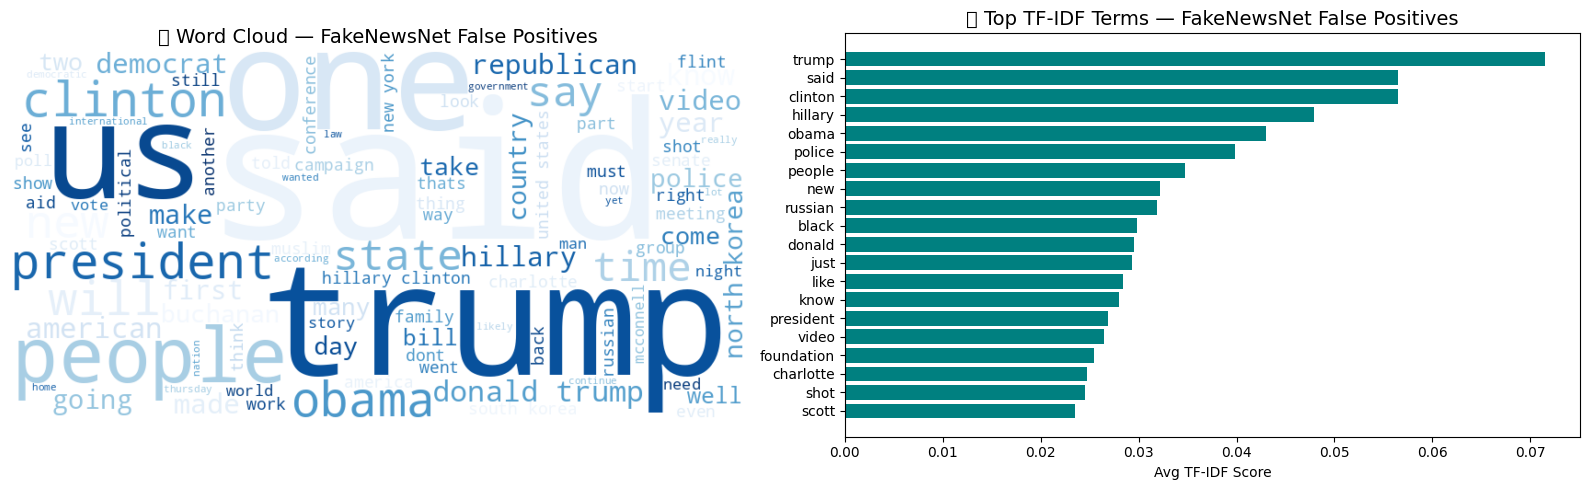

<ipython-input-3-fed4fe6571ac>:53: UserWarning: Glyph 127781 (\N{WHITE SUN BEHIND CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-fed4fe6571ac>:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127781 (\N{WHITE SUN BEHIND CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


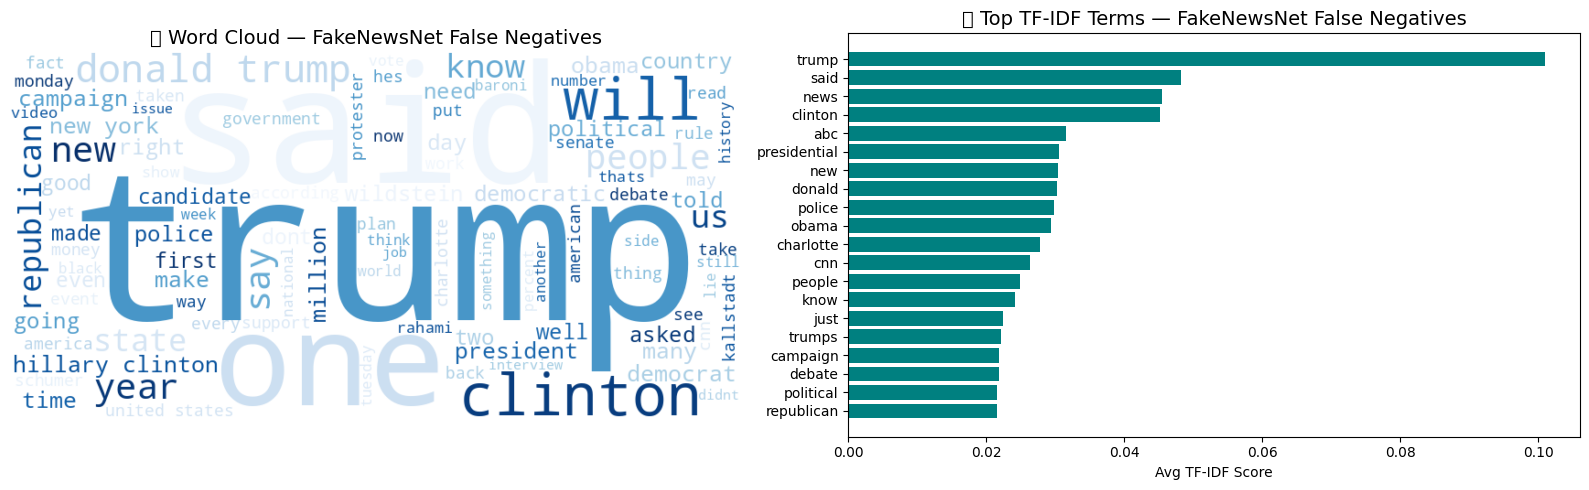

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


datasets = {
    "LIAR False Positives": "/content/drive/MyDrive/misinfo_project/misclass/liar_false_positives.csv",
    "LIAR False Negatives": "/content/drive/MyDrive/misinfo_project/misclass/liar_false_negatives.csv",
    "FakeNewsNet False Positives": "/content/drive/MyDrive/misinfo_project/misclass/fakenewsnet_false_positives.csv",
    "FakeNewsNet False Negatives": "/content/drive/MyDrive/misinfo_project/misclass/fakenewsnet_false_negatives.csv"
}

# Function to show Word Cloud + TF-IDF side by side
def show_wordcloud_and_tfidf(csv_path, title, top_n=20):
    df = pd.read_csv(csv_path)
    texts = df["text"].astype(str).tolist()
    full_text = " ".join(texts)

    # Word Cloud
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        width=800,
        height=400,
        colormap='Blues'
    ).generate(full_text)

    # TF-IDF
    tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = tfidf.fit_transform(texts)
    avg_scores = tfidf_matrix.mean(axis=0).A1
    terms = tfidf.get_feature_names_out()
    top_indices = avg_scores.argsort()[::-1][:top_n]
    top_terms = [(terms[i], avg_scores[i]) for i in top_indices]

    # Plot
    plt.figure(figsize=(16, 5))

    # Word cloud
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud — {title}", fontsize=14)

    # TF-IDF
    plt.subplot(1, 2, 2)
    t_terms, t_scores = zip(*top_terms)
    plt.barh(t_terms[::-1], t_scores[::-1], color='teal')
    plt.title(f"Top TF-IDF Terms — {title}", fontsize=14)
    plt.xlabel("Avg TF-IDF Score")

    plt.tight_layout()
    plt.show()

for label, path in datasets.items():
    show_wordcloud_and_tfidf(path, label)
